# Supplemental Figure 5a (CoMut-Plot) in Blanco-Heredia, et al. Nat. Commun. 2023
## Plotted by blancoj@mskcc.org on 02FEB22

In [1]:
## Libraries

from comut import comut
from comut import fileparsers
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import palettable

# Change rcParams

from matplotlib import rcParams
custom_rcParams = {'font.family': 'Helvetica',
                   'font.size': 12, 'legend.title_fontsize': 'larger'}
rcParams.update(custom_rcParams)
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
## Inputs

mut_input = pd.read_csv("TNBC302_IN_muts.csv")
mut_input = mut_input.rename(columns={"TUMOR_SAMPLE": "Tumor_Sample_Barcode", "SYMBOL": "Hugo_Symbol"})

# Collapse variants

variants = ['Frame_Shift_Del', 'Frame_Shift_Ins', 'In_Frame_Del', 'In_Frame_Ins', 'Missense_Mutation', 'Nonsense_Mutation', 'Splice_Region', 'Splice_Site']
rename = {'Frame_Shift_Del' : 'Frame-Shift Indel', 'Frame_Shift_Ins' : 'Frame-Shift Indel', 'In_Frame_Del' : 'In-Frame Indel', 'In_Frame_Ins' : 'In-Frame Indel', 'Missense_Mutation' : 'Missense', 'Nonsense_Mutation' : 'Nonsense', 'Splice_Region' : 'Splice', 'Splice_Site' : 'Splice'}

# Extracting and saving mutation data frame

mutation_df = fileparsers.parse_maf(mut_input,variants=variants, rename=rename)
mutation_df.to_csv('TNBC302_Muts_CoMut.tsv', sep = '\t', index = False)

# Specify samples

samples = ['P0', 'M0', 'M1', 'M3', 'M18', 'M17', 'M10C', 'M6B', 'M8B', 'M6A', 'M16', 'M9', 'M15', 'M5A', 'M12A', 'M8A', 'M7', 'M11A', 'M10E', 'M5C', 'M11B', 'M10D', 'M5B', 'M12B']

# Get the genes list

genes_array = np.unique(mutation_df["category"])
genes = genes_array.tolist()
genes.reverse()

In [3]:
## Edits

# Set appearance values and make the necesary changes after seeing the figure out of the notebook

figsize = (20,10) # the size of the figure - changes the shape of the squares in the comut
dpi = 300 # change the output resolution
extension = '.svg' # extension for saving - can otherwise be .pdf, .png, .jpg, etc
x_padding = 0.04 # the x distance between patches in comut
y_padding = 0.04 # the y distance between patches in comut
tri_padding = 0.03 # the distance between triangles in comut

# LOH as border

borders = ['LOH']

# Set colours and palettes

vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
purp_6 = palettable.cartocolors.sequential.Purp_6.mpl_colormap
purp_7 = palettable.cartocolors.sequential.Purp_7.mpl_colormap
mint_5 = palettable.cartocolors.sequential.Mint_5.mpl_colormap
safe_10 = palettable.cartocolors.qualitative.Safe_10.mpl_colors
balance_6 = palettable.cmocean.diverging.Balance_6.mpl_colors

# Mapping of mutation type to color. Only these mutation types are shown

mut_mapping = {'Missense': "#4EAF49", 'Nonsense': '#9999CB', 'In-Frame Indel': '#F57F20', 'Splice': '#F8ED39',
               'Frame-Shift Indel': '#21409A', 'LOH': {'facecolor':'none', 'edgecolor':'black', 'linewidth': 2}, 'Absent': {'facecolor': 'grey', 'alpha': 0.05}}


In [4]:
# Adding and extracting LOH

LOH_subset = mut_input[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'facetsLOHCall']]
LOH_subset = LOH_subset.rename(columns={"Tumor_Sample_Barcode": "sample", "Hugo_Symbol": "category"})
LOH_subset['facetsLOHCall'] = LOH_subset['facetsLOHCall'].map({True: 'True', False: 'False'})
LOH_subset = LOH_subset[LOH_subset['facetsLOHCall'].str.contains('False') == False]
LOH_subset['value'] = 'LOH'

LOH_data = LOH_subset[['sample', 'category', 'value']]

LOH_data.to_csv('TMBC302_LOH.tsv', sep = '\t', index = False)

mutation_df = pd.concat([mutation_df, LOH_data])

In [5]:
# Basic Comut

comut = comut.CoMut()
comut.samples = samples

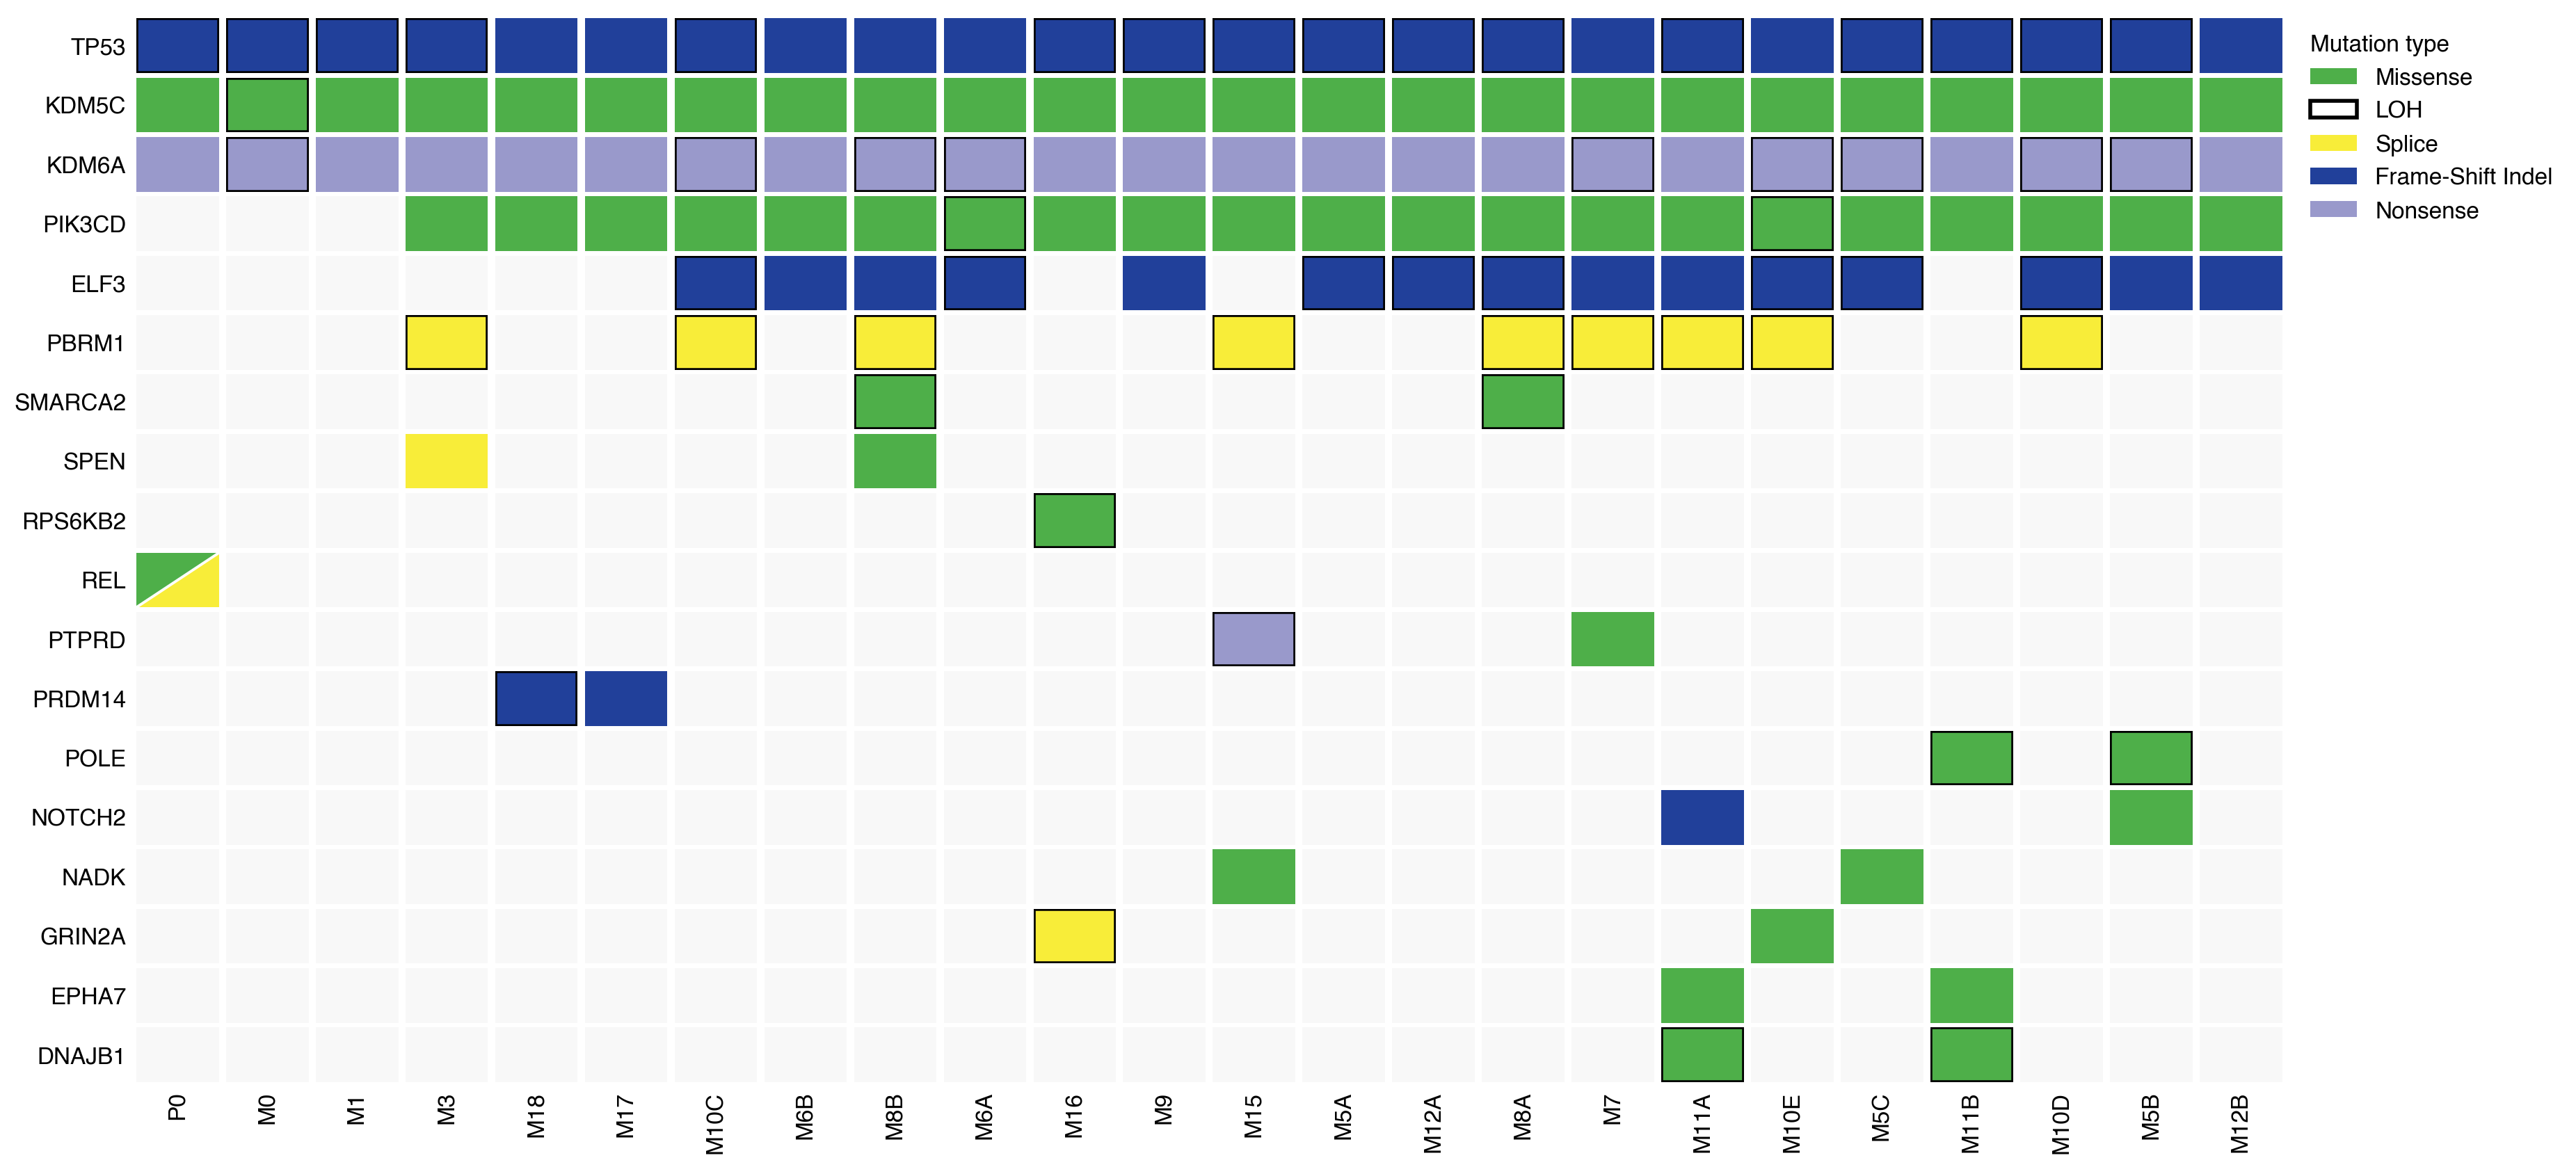

In [6]:
# Add data to the CoMut object
comut.add_categorical_data(mutation_df, name = 'Mutation type', category_order = ['DNAJB1', 'EPHA7', 'GRIN2A', 'NADK', 'NOTCH2', 'POLE', 'PRDM14', 'PTPRD', 'REL', 'RPS6KB2', 'SPEN', 'SMARCA2', 'PBRM1', 'ELF3', 'PIK3CD', 'KDM6A', 'KDM5C', 'TP53'], mapping = mut_mapping, borders = borders, tick_style = 'italic')

# Plot comut and add unified legend
comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, figsize = figsize)

comut.add_unified_legend()

In [7]:
# Adding and extracting Purity

purity_value_range = (0.05, 0.95)

Purity_subset = mut_input[['Tumor_Sample_Barcode', 'Purity']]
Purity_subset = Purity_subset.rename(columns={"Tumor_Sample_Barcode": "sample", "Purity": "value"})
Purity_subset = Purity_subset.drop_duplicates()
Purity_subset['category'] = "Purity"

Purity_data = Purity_subset[['sample', 'category', 'value']]
Purity_data.to_csv('TNBC302_Purity.tsv', sep = '\t', index = False)
Purity_data.tail(5)

comut.add_continuous_data(Purity_data, name = 'Purity',  mapping = purp_6, value_range = purity_value_range)

In [8]:
# Adding CNA, note that CNA is a second plot that needs to be manually overlapped to the comut

CNA_input=pd.read_csv('TNBC302_CoMut_CNV_bygene.txt', sep = '\t', low_memory=False)
CNA_input
CNA_subset = CNA_input[['hgnc', 'P0', 'M0', 'M1', 'M3', 'M18', 'M17', 'M10C', 'M6B', 'M8B', 'M6A', 'M16', 'M9', 'M15', 'M5A', 'M12A', 'M8A', 'M7', 'M11A', 'M10E', 'M5C', 'M11B', 'M10D', 'M5B', 'M12B']]
CNA_subset = CNA_subset[pd.DataFrame(CNA_subset.hgnc.tolist()).isin(genes).any(axis=1).values]
CNA_subset.index  = list(CNA_subset['hgnc'])
CNA_subset = CNA_subset.drop(['hgnc'], axis = 1)
CNA_subset = CNA_subset.stack().reset_index()
CNA_subset.columns = ['category','sample',  'value']
CNA_subset = CNA_subset[CNA_subset['value']!= 0.0]
CNA_subset = CNA_subset[CNA_subset['value'].notna()]
CNA_subset['value'] = CNA_subset['value'].replace({ 2:'Amplification', -2: 'Homozygous deletion', 1: 'Gain', -1: 'Loss' })
CNA_df = pd.concat([CNA_subset, CNA_subset.assign(value = 'Baseline')], ignore_index=True)
CNA_df.head(5)

CNA_df.to_csv('TNBC302_CNA.csv', index=False) 

CNA_mapping = {'Baseline':'white', 'Amplification': '#FF0800', 'Homozygous deletion': '#1C75BC', 'Gain': '#F8B4C0', 'Loss': '#AED8E6'}

comut.add_categorical_data(CNA_df, name='CNA', mapping = CNA_mapping, category_order = ['DNAJB1', 'EPHA7', 'GRIN2A', 'NADK', 'NOTCH2', 'POLE', 'PRDM14', 'PTPRD', 'REL', 'RPS6KB2', 'SPEN', 'SMARCA2', 'PBRM1', 'ELF3', 'PIK3CD', 'KDM6A', 'KDM5C', 'TP53'], tick_style='italic')

In [9]:
# Adding Hotspot

Hotspot_subset = mut_input[['Tumor_Sample_Barcode', 'Hugo_Symbol', 'HOTSPOT_INTERNAL']].copy()
Hotspot_subset.loc[:, 'HOTSPOT_INTERNAL'] = Hotspot_subset['HOTSPOT_INTERNAL'].map({True: 'True', False: 'False'})
Hotspot_subset = Hotspot_subset[Hotspot_subset['HOTSPOT_INTERNAL'] != 'False']
Hotspot_subset = Hotspot_subset[pd.DataFrame(Hotspot_subset.Hugo_Symbol.tolist()).isin(genes).any(axis=1).values]
gene_names = Hotspot_subset.Hugo_Symbol.tolist()
sample_names = Hotspot_subset.Tumor_Sample_Barcode.tolist()


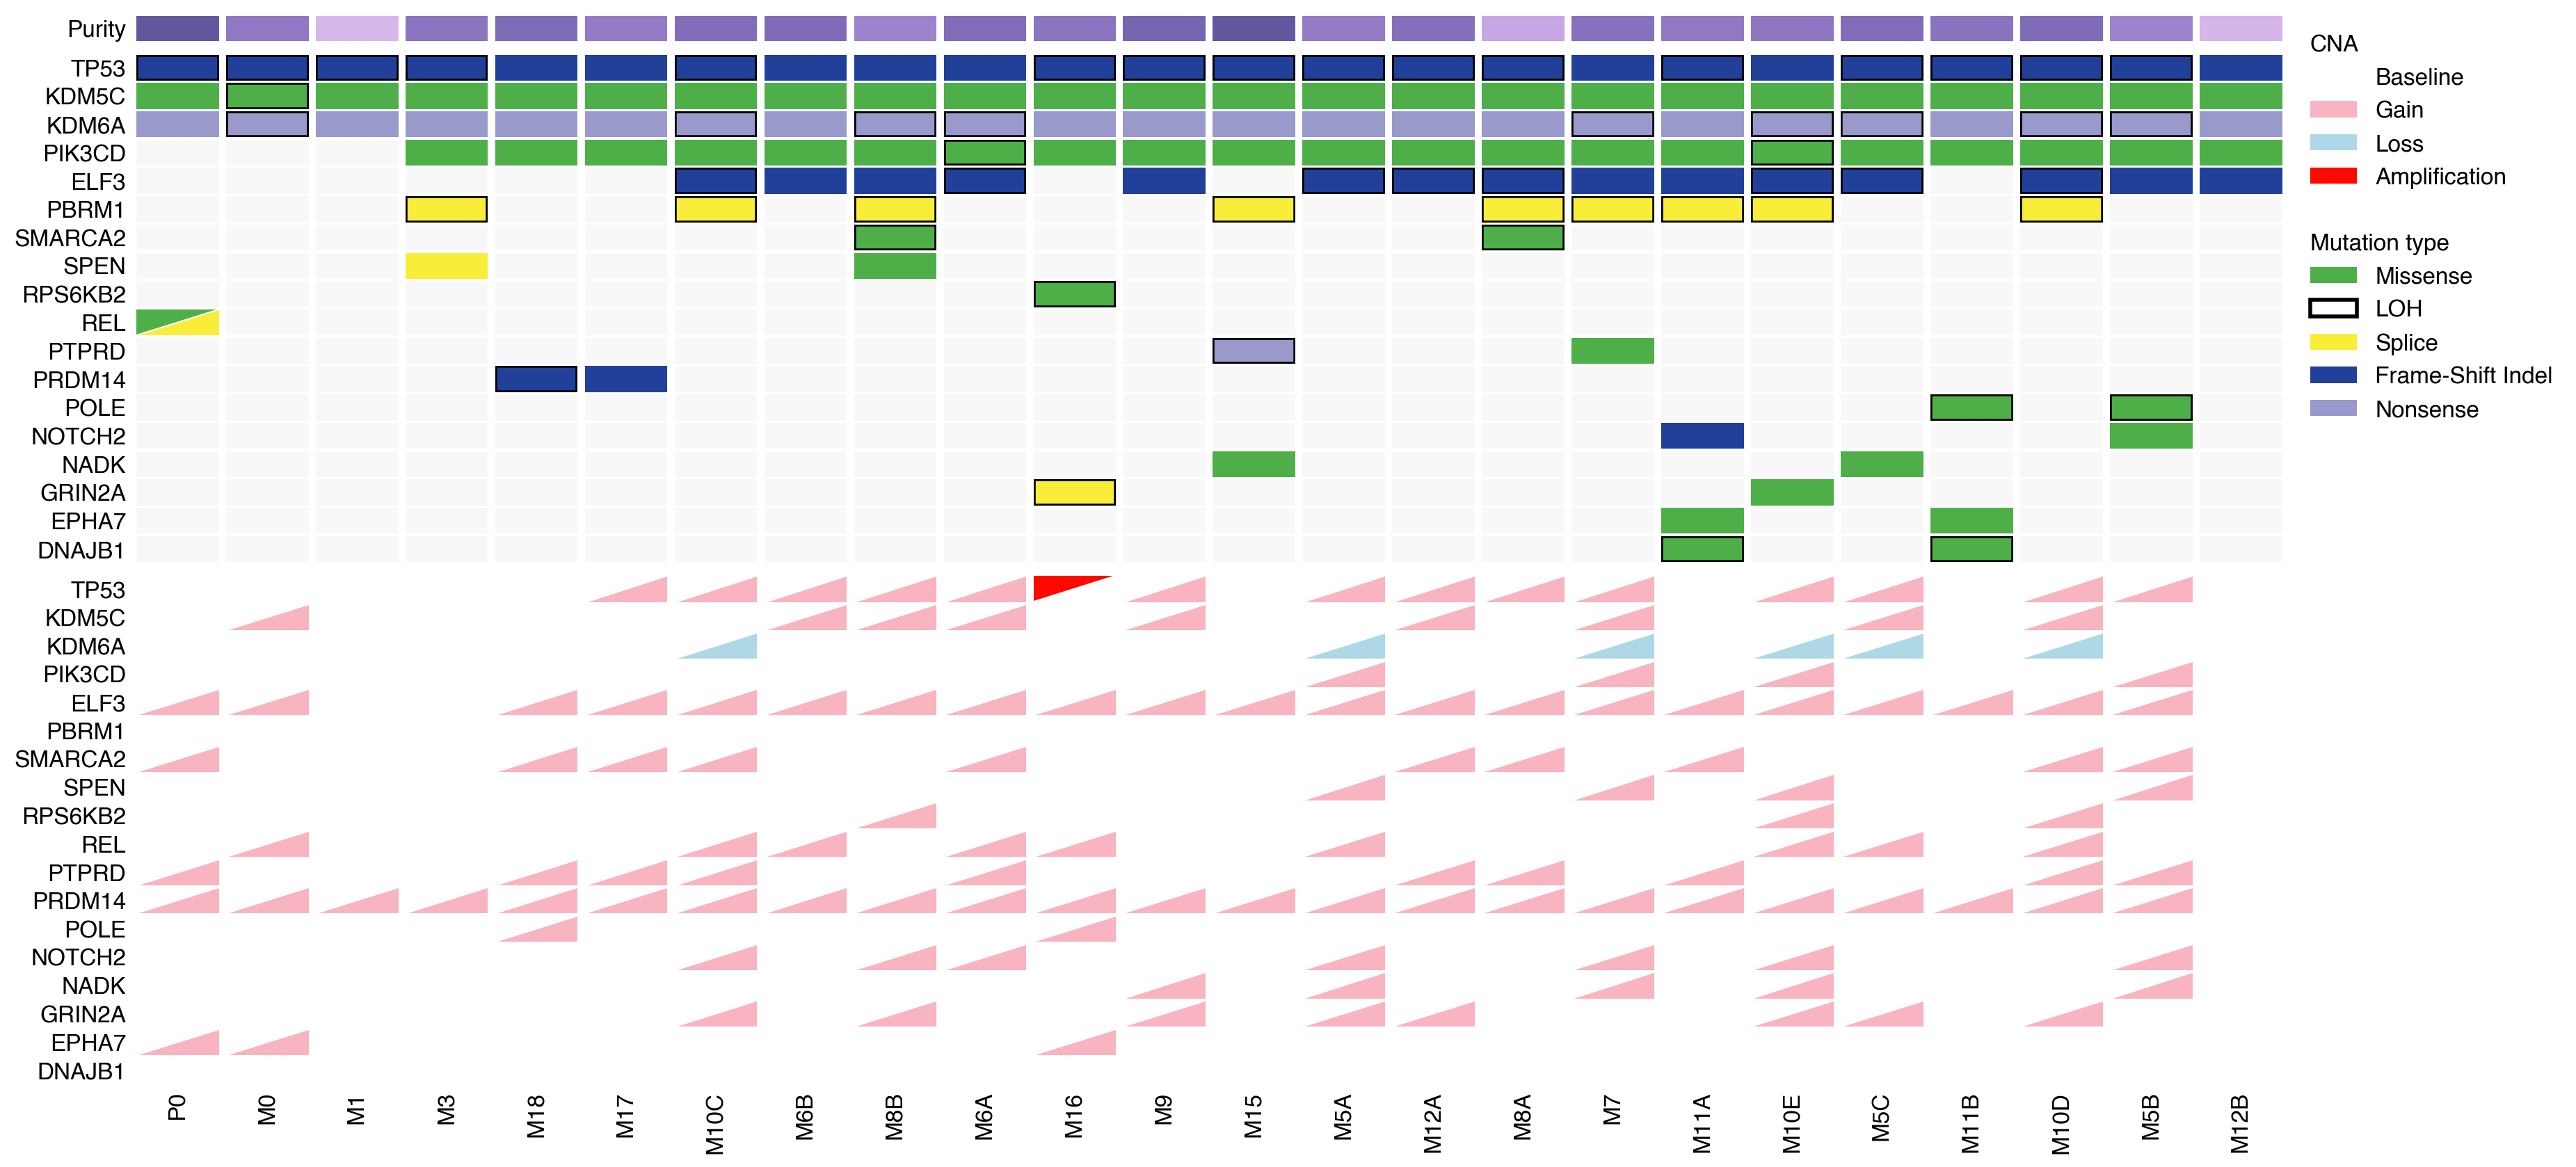

In [10]:
# plot CoMut

# define structure
structure = [['CNA'],
             ['Mutation type'],
             ['Purity']
             ]

comut.plot_comut(x_padding = x_padding, y_padding = y_padding, tri_padding = tri_padding, hspace = 0.03, structure = structure, figsize = figsize)
comut.add_unified_legend()

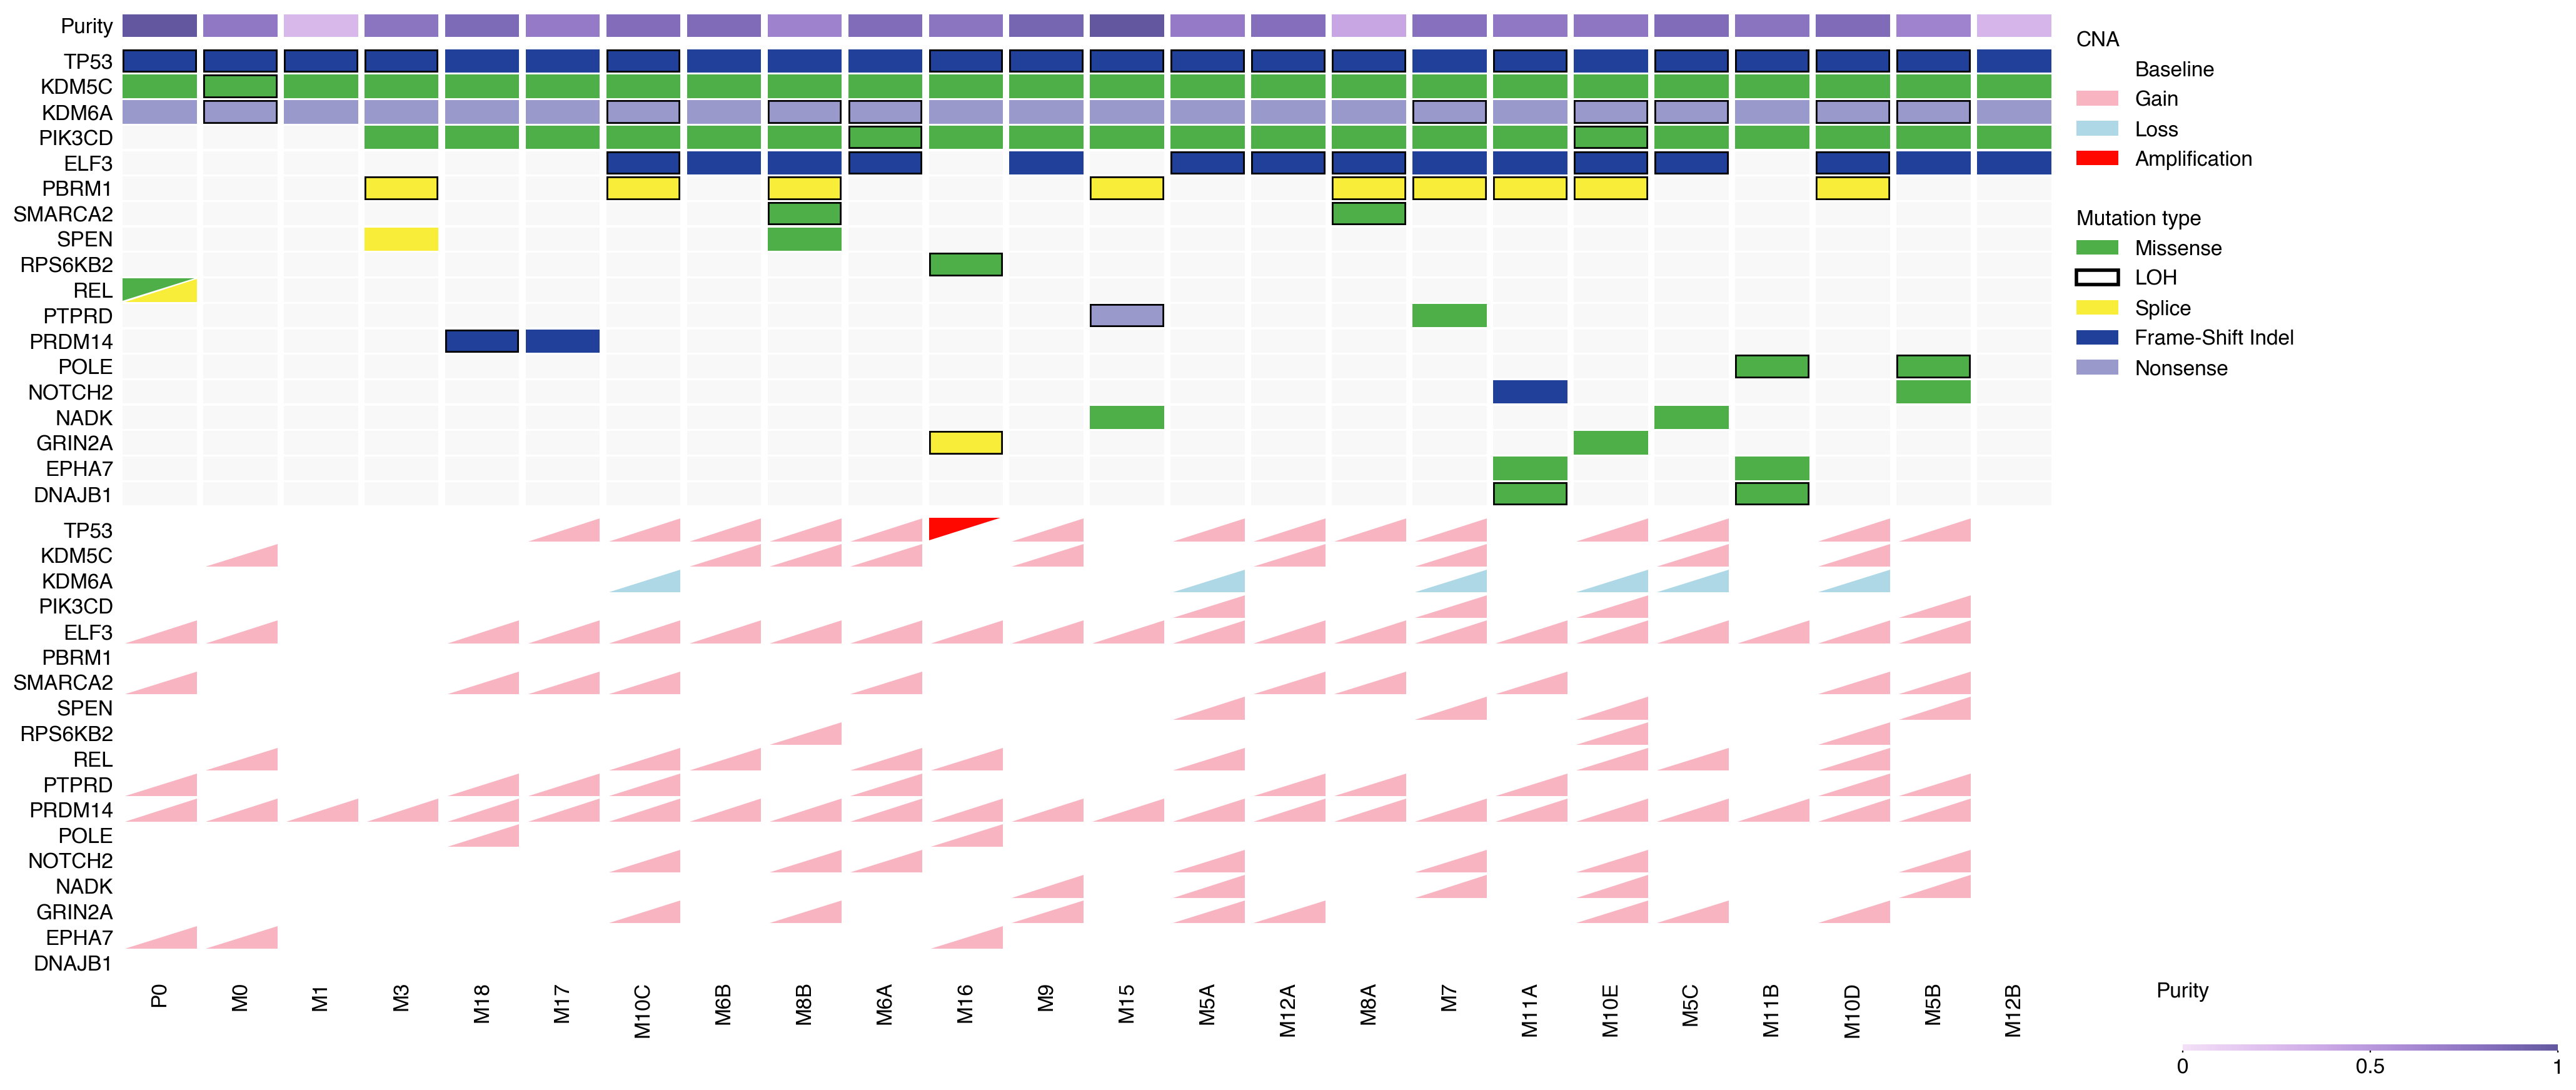

In [11]:
# Adding Purity colour bar note that colour bars must be added manually based on figure coordinates - [left, bottom, width, height]

purity_ax = comut.figure.add_axes([0.95, 0.05, 0.15, 0.0050]) # <- horizontal
#purity_ax = comut.figure.add_axes([0.95, 0.05, 0.015, 0.15]) # <- Vertical
norm = matplotlib.colors.Normalize(vmin=0, vmax=1)
purity_colorbar = comut.figure.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=purp_7),
                                                 cax=purity_ax, orientation='horizontal')
purity_colorbar.ax.tick_params(size=1)
purity_colorbar.set_ticks([0,0.5,1])
purity_colorbar.set_ticklabels([0,0.5,1])
purity_colorbar.outline.set_visible(False)
purity_colorbar.set_label('Purity', labelpad = -55, x = 0, fontsize = 12)

comut.figure

In [12]:
# Save CoMut figure as svg

comut.figure.savefig('SupFig5a_CoMut' + extension, bbox_inches = 'tight', dpi = dpi)

# Save CoMut figure as pdf with editable text

plt = comut.figure
plt.savefig("SupFig5a_CoMut.pdf", transparent=True)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
